# Yongjie's CA1-Classification Model

Name: Li Yongjie

ID: 2342377

Class: DAAA/FT/1B/01

# Background:
This is a dataset collected from an environmental company. The dataset contains
various information on water from different sources. From the perspective of quality
control, the company wants to build a machine learning model to predict water quality
based on the water properties.

# Objective
Use a classification learning model to predict water quality 

# References:

Srivastava, T. (2023) Tuning the parameters of your random forest model, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ (Accessed: 26 November 2023). 

0.  Data preperation

In [77]:
# Importing the necessarty modules
import pandas as pd # Handles DataFrame
import matplotlib.pyplot as plt #Plot Graphs
import seaborn as sns # Plotting Graphs
sns.set_theme(palette='pastel')

import numpy as np

# import func that allows us to do test-split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as IMBPipeline

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


# import func to perform model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,RocCurveDisplay
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    StratifiedKFold,
)


In [78]:
#Loading the data for Classification and analysing it
df= pd.read_csv('./CA1-Classification-Dataset.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 1. Exploratory Data Analysis
Now, we will beegin our exploratory data analysis, with the aim to gain a better understanding on the water properties and how they affect the water quality.

Firstly, we would have to gain a brief understanding on the 9 different water properties and the tagert 'quality':

<ul>
    <li><strong>pH:</strong>
        <p>Measure of acidity/alkalinity in water. Scales from 0 to 14, from very acidic to very alkaline with 7 being neutral.</p>
    </li>
    <li><strong>Hardness:</strong>
        <p>Indicates the concentration of minerals in the water.</p>
    </li>
    <li><strong>Solids:</strong>
        <p>Refers to the total amount of solids dissolved and suspended particles.</p>
    </li>
    <li><strong>Chloramines:</strong>
        <p>Refers to the amount of chlorine compounds in water.</p>
    </li>
    <li><strong>Sulfate:</strong>
        <p>Refers to the amount of sulfate ions in water.</p>
    </li>
    <li><strong>Conductivity:</strong>
        <p>Refers to the conductivity of water.</p>
    </li>
    <li><strong>Organic Carbon:</strong>
        <p>Proportion of organic carbon in water.</p>
    </li>
    <li><strong>Trihalomethanes:</strong>
        <p>Measure of chemical compounds formed from the reaction of organic/inorganic materials with chlorine.</p>
    </li>
    <li><strong>Clarity:</strong>
        <p>Measure of transparency of water.</p>
    </li>
    <li><strong>Quality:</strong>
        <p>Represents an overall measure of water quality based on the water properties. Label indicates acceptable quality, 1 means potable and 0 means non-potable.</p>
    </li>
</ul>


    

**Exploring Dataset**

In order to prevent our data set from being mutated, we will create a copy of the original dataset

In [79]:
df_explore = df.copy()

1.1 Getting descriptive information

In [80]:
df_explore.shape

(3276, 10)

In [81]:
df_explore.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

In [82]:
# Finding the percantage of missing values in each column
df_explore.isna().sum()/df_explore.count()

ph                 0.176302
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.313026
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.052023
Clarity            0.000000
Quality            0.000000
dtype: float64

In [83]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Based on the information we collected, we can observe that the dataset we are working with contains 3276 rows and 10 columns (9 features + 1 target).

We can tell that all the datatype are numeric and that we have no categorical data that we need to handle. However, there are missing values for 3 of the columns which has to be handled with later on. Columns that have missing data includes, ph - 17.6%, Sulfate - 31.3% and Trihalomethanes - 5.2%

### 1.2 Data information

Since all the data are numeric, there are no unique values that we need to handle. Now we will work towards understanding our target viarable

In [84]:
df_explore['Quality'].unique()

array([0, 1], dtype=int64)

We can take note that our target is a binary value of 0 or 1.
Which we can assume:

<ul>
    <li>1 - Potable</li>
    <li>0 - Non-potable</li>
</ul>

<p>By creating a simple bar chart we are able to see the distribution of the quality in our dataset.</p>

In [85]:
# df_explore['Quality']=df_explore['Quality'].replace(0,'Non-Potable').replace(1,'Potable')

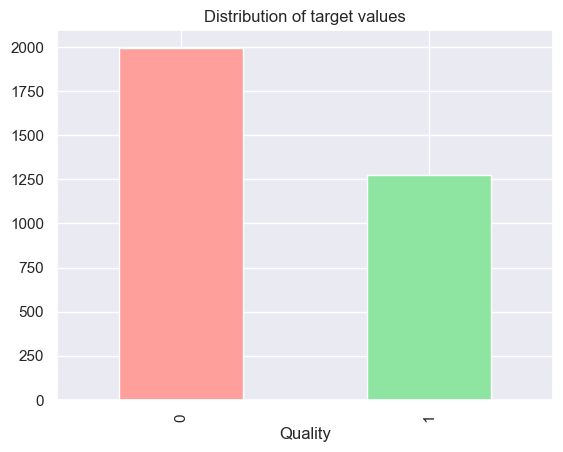

In [86]:
bar_values = df_explore['Quality'].value_counts()
bar_values.plot(kind="bar", title="Distribution of target values", color = ['r', 'g'])
plt.show()

We can tell that there is about 1.5 times more non-potable water compared to acceptable water potable, which although is quite similar, it could be distributed more equally and can be worked on.

1.2 Data Visualisation

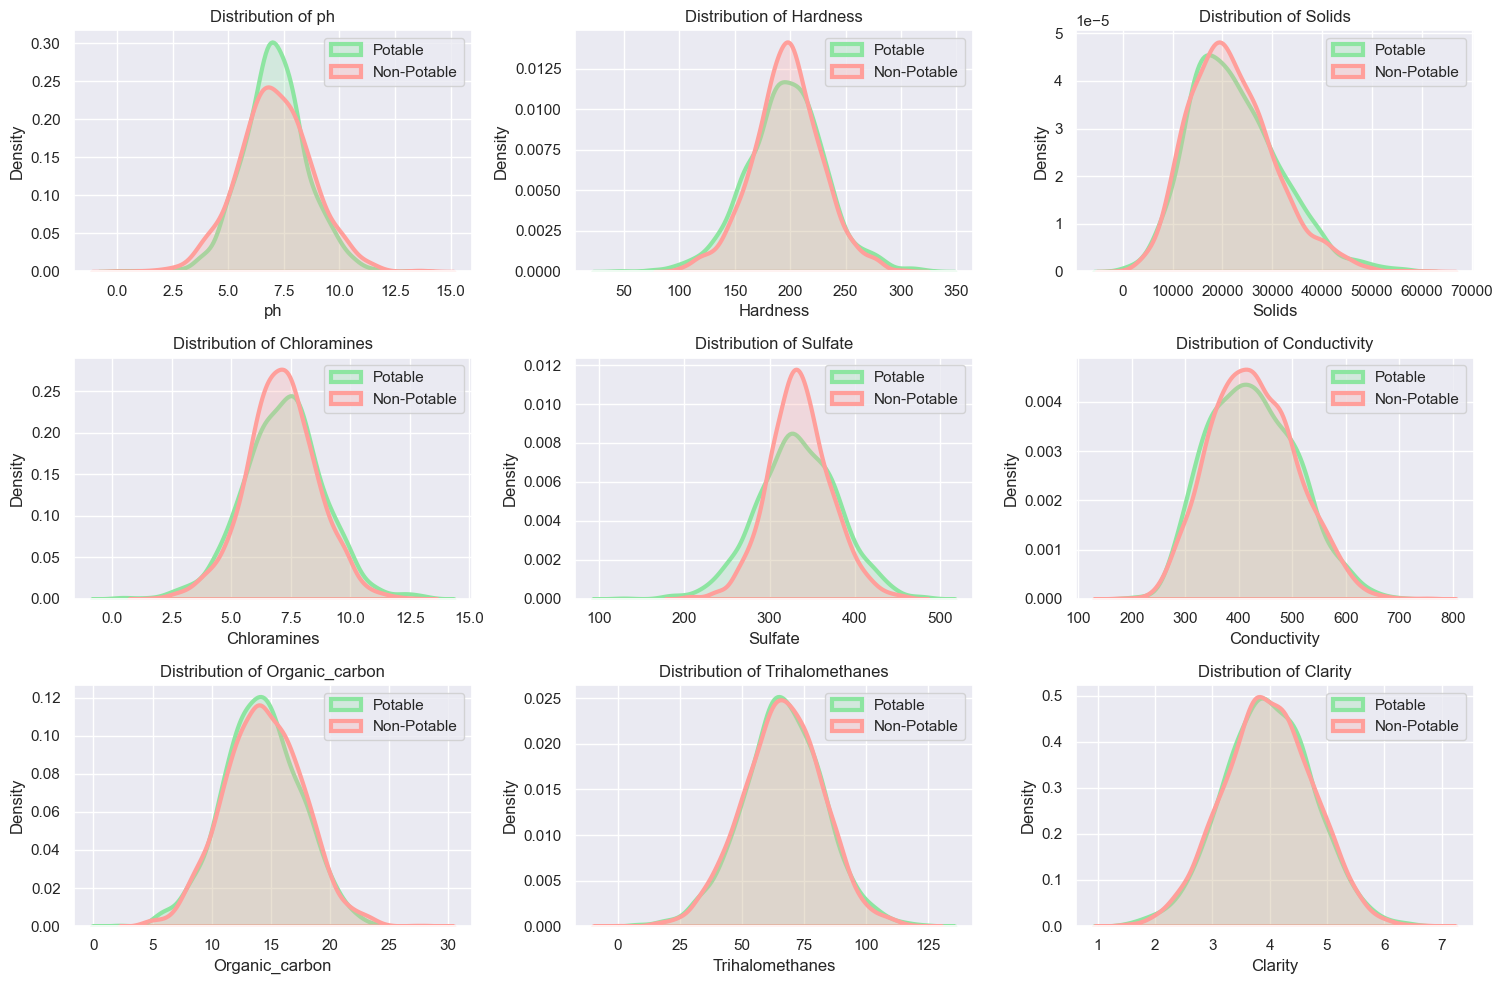

In [87]:
def plot_hist(features):
    num_features = len(features)
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)

        sns.kdeplot(
            df[df["Quality"] == 1][feature], lw=3, color="g", ax=axes[row, col], label = 'Potable', fill=True
        )

        sns.kdeplot(
            df[df["Quality"] == 0][feature], lw=3, color="r", ax=axes[row, col], label = 'Non-Potable', fill=True
        )

        axes[row, col].legend()
        axes[row, col].set_title(f"Distribution of {feature}")
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

plot_hist(["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"])

**Summary for feature's and it's graph**
<ol>
    <li>ph: Distrubuion between Potable and Non-Potable are both normal and very similar. However, we can see that desinity is slightly higher for potable water around the median when ph = 7, suggesting a trend that there is a higher likelihood that water is potable around the median. We can also see towards the tails there is a higher likelihood that the water is non-potable espacially around ph<2 or ph> 12</li>
    <br>
    <li>Hardness: Similar to ph, the distribution between Potable aand Non-Potable are both normal and very similar. On the contraty to ph, we can see the opposite where desinity is slighty higher for non-potable water towards the median of 200, while we can see towards the tails there is a higher likelihood that water is potable around hardness<75 or hardness> 325. </li>
    <br>
    <li>Solids: </li>
</ol



We can also check for any correlations between the different properties using a heatmap

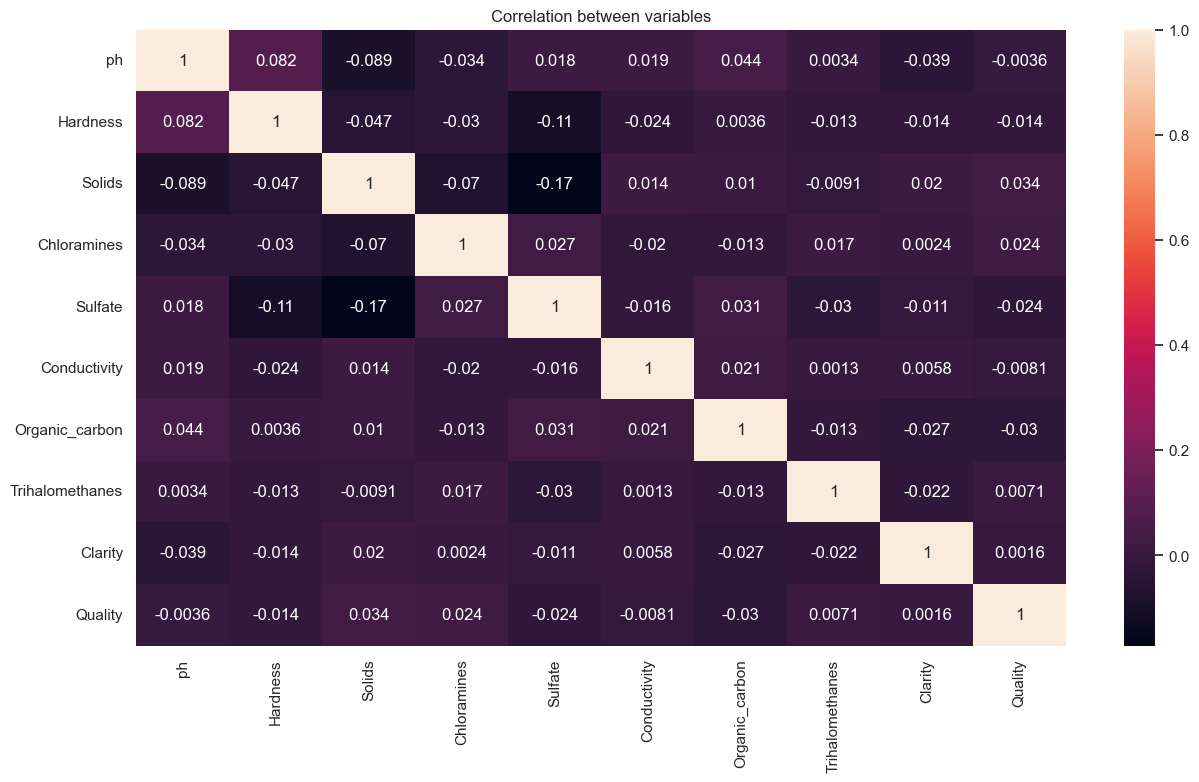

In [88]:
df_heatmap = df_explore
plt.figure(figsize=(15, 8))
sns.heatmap(df_heatmap.corr(), annot=True).set(title="Correlation between variables")
plt.show()

<u>Observation</u>
<ul>
    <li>From the heatmap, we can conclude that there is very less correlation between any of the variables as correlation value for all are close to 0 with the highest value being 0.082 and lowest value being -0.17.</li>
</ul>

# 2. Data Preparation

Grouping data into Target and Features

In [89]:

X, y = df.drop(['Quality'], axis=1), df['Quality']


### 2.1 Spliting Data Points
In order to evaluate our model after training it, we wil need a testing set that it has not seen. Therefore, we will split our data set into train and test set by 80-20, we also set stratify=y to ensure that the distribution of classes in y is the same as overall to prevent imbalanced distribuition and a biased model.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=69)
X_training = X_train.copy()

### 2.2 Data preprocessing
As addressed earlier in our EDA, there are missing values that needs to be handled.

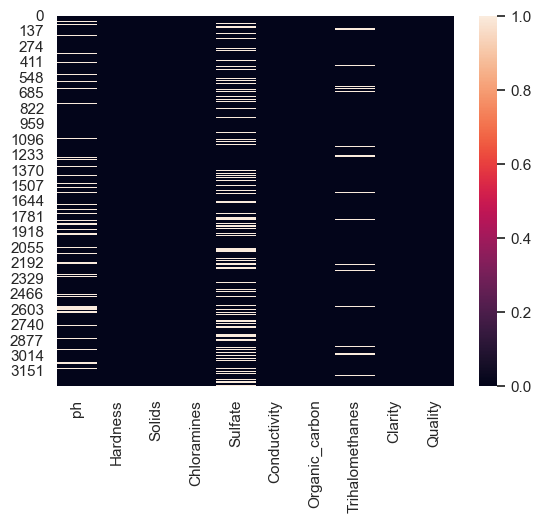

In [91]:
sns.heatmap(df.isna())
plt.show()

We can see that there are many missing data which we addressed earlier on, so now we will have to deal with it.
There are several ways to go about dealing with missing data:

<ol>
    <li>Dropping rows or columns with missing values</li>
    <li>Fowards/Backward fill</li>
    <li>Simple imputer using average(mean, mode or median)</li>
    <li>KNN/Iterative Imputer</li>
</ol>

Since our dataset is small we will be using the KNN imputer which is a quick and effective

In [92]:
# select columns that need to be imputed
cols = ['ph', 'Sulfate', 'Trihalomethanes']

# init the imputer
imputer = KNNImputer()

# impute the copy of training set to check if imputer is working
X_training.loc[:,cols] = imputer.fit_transform(X_training[cols])

In [93]:
# Check if there is still anymore missing value
X_training.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Clarity            0
dtype: int64

In our EDA we also found that our target variable has unbalanced distribution as there is about 1.5 times more non-potable water compared to potable, so we will have to deal with it by resampling our data.

There are several ways to resample the data:
<ol>
    <li>Random Under-Sampling</li>
    <li>Random Over-Sampling</li>
    <li>Random Combined-Sampling</li>
    <li>SMOTE</li>
</ol>

Since we have are dealing with a small data set, we will be using SMOTE(Synthetic Minority Oversampling Technique) as it increase the number of instance in the minority class(Potable water) using synthetic data from the dataset, unlike ROS which randomly replicates existing data which could result in risk of over fitting, which is why we are using SMOTE over ROS.



In [94]:
resample = RandomOverSampler(random_state=69)
X_resampled, y_resampled = resample.fit_resample(X_training, y_train)

In [95]:
print("Before: ",X_training.shape)
print("After: ",X_resampled.shape)

Before:  (2620, 9)
After:  (3196, 9)


In [96]:
# From this we can see that number of datapoints for target value has increased
print("Before: ", y_train.shape)
print("After: ",y_resampled.shape)

Before:  (2620,)
After:  (3196,)


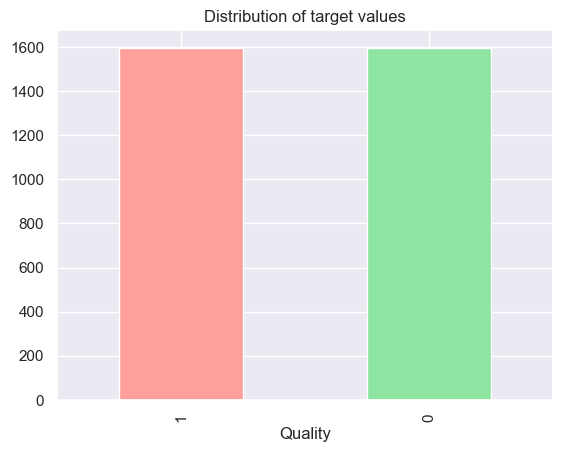

In [97]:
bar_resampled_values = y_resampled.value_counts()
bar_resampled_values.plot(kind="bar", title="Distribution of target values", color = ['r', 'g'])
plt.show()

Summary:
By using SMOTE, we are able to populate the minority target value by producing synthetic data through nearest neighbors in the training data so that we can have an equal distrubution in target value to reduce biasness and overfitting.  


### Standardization
There are several ways we can Standardize our data such as using:
<ol>
    <li>Standard Scaler</li>
    <li>Robust Scaler</li>
</ol>

Standard scaler which scales the data such that the mean = 0 and standard deviation = 1.<br>
It uses Z graph and calculates z using the formula:

$$z = \frac{x-u}{s}$$

Meanwhile, Robust Scaler removes the median and scales the data according to the Inter Quartile Range which is between 25% and 75%.

Since we have finding out during EDA that we need to consider that we are dealing with multiple outliers, we have to take into consideration that the outliers would have a large affect on the standard deviation of the data. Hence, we will use Robust Scaler which is more suitable as it is less influenced by outliers since it uses the IQR.



In [98]:
col = list(X_training.columns)

scale = RobustScaler()

X_scaled = X_resampled.copy()
X_scaled[col] = scale.fit_transform(X_scaled[col])
X_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity
0,0.255552,-0.330947,-0.530058,0.164155,0.044643,0.529095,-1.137390,0.758620,0.479759
1,-0.386370,-0.251506,1.679998,1.247326,0.714388,0.822244,-0.574981,0.392878,0.368297
2,0.208341,-1.311025,-0.147575,-0.535200,0.862697,0.558509,-0.054390,-0.155966,0.130409
3,0.401284,-0.552174,0.836658,0.534691,-1.484685,0.141253,-1.059510,-0.752911,-0.070341
4,-1.209409,0.274778,-0.424583,-0.754506,0.369692,-0.143319,-0.604757,0.853319,-0.592902
...,...,...,...,...,...,...,...,...,...
3191,0.430210,0.221410,1.108001,0.392979,-0.804433,-0.635179,1.130013,0.663189,0.564972
3192,0.370886,0.819021,1.175655,0.255428,0.706079,-0.992322,0.940246,0.253270,0.750463
3193,-1.115638,-0.571226,1.041282,-0.560881,0.407249,0.742592,0.790627,-0.221041,-0.012435
3194,-2.002109,3.060353,1.504091,0.893321,0.320245,0.805222,-0.876096,0.199450,-0.008520


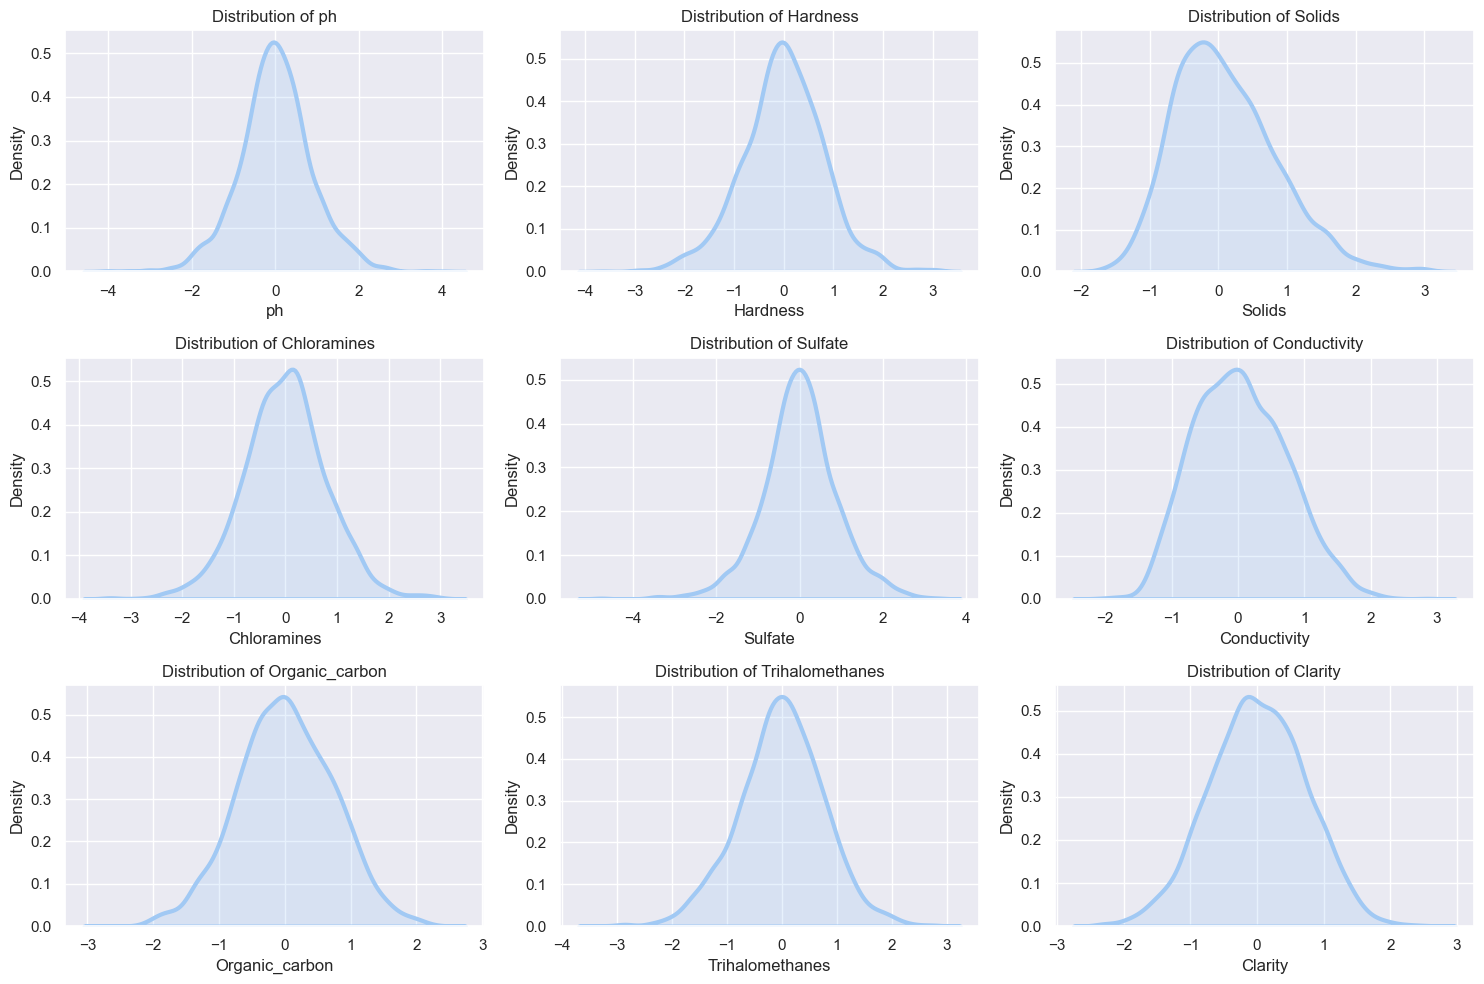

In [99]:
df_preprocessed = pd.concat([X_scaled, y_resampled], axis=1,join='outer')

def plot_hist(features):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)

        sns.kdeplot(
            df_preprocessed[feature], lw=3, color="b", ax=axes[row, col], fill=True
        )

        axes[row, col].set_title(f"Distribution of {feature}")
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

plot_hist(["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"])

<u>Observation:</u><br>
As we can see, the range of values have been standardized and most of the data takes up a range of -3 to 3. However, there are still some outliers which affects the features.

# 4.Model selection

In order to find the best model, I will be training multiple model and see which yield the best results from metrics.

### 4.1 Creating Pipeline

In [100]:
steps = [
    ("impute", KNNImputer()),
    # ("rescale", SMOTE(random_state=69)),
    ("standardize", RobustScaler()),
    ("model")
]

STEPS_LEN = len(steps) -1


### 4.2 Creating a Dummy Model
The dummy model acts as a control, it is a baseline model for comparison to our other models. I will be using DummyClassifier as a benchmark for my other models as it is intepretable and simple.

In [123]:
steps[-1] = ("model", DummyClassifier(strategy="uniform"))


X_train_splited, x_val,y_train_splited, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, shuffle=True, random_state=42)


dummy = Pipeline(steps=steps)
dummy.fit(X_train_splited, y_train_splited)

y_val_pred = dummy.predict(x_val)

print(classification_report(y_val, y_val_pred))

# # preset scoring options
# scoring_methods = ["accuracy", "recall", "f1", "roc_auc"]
    
# from sklearn.dummy import DummyClassifier

# steps[STEPS_LEN] = ("model", DummyClassifier(strategy="uniform"))
# dummy = IMBPipeline(steps=steps)
# dummy.fit(X_train, y_train)
# print(f"Baseline Accuracy Score :{dummy.score(X_train, y_train)}")
# scores = cross_validate(
#     dummy,
#     X_train,
#     y_train,
#     cv=10,
#     scoring=scoring_methods,
#     n_jobs=4,
#     return_train_score=True,
# )
# # Assuming scores is a DataFrame
# dummy_model_score = pd.DataFrame(scores)
# # Create a new row as a DataFrame with the mean values
# mean_row = pd.DataFrame([dummy_model_score.mean()], columns=dummy_model_score.columns, index=["Mean"])
# # Concatenate along rows (axis=0) to add the mean row
# dummy_model_score = pd.concat([dummy_model_score, mean_row])

# display(dummy_model_score.style.apply(
#         lambda x: [
#             "background-color: red; color: white" if v else "" for v in x == x.min()
#         ]
#     )
#     .apply(
#         lambda x: [
#             "background-color: green; color: white" if v else "" for v in x == x.max()
#         ]
#     ))


              precision    recall  f1-score   support

           0       0.59      0.48      0.53       320
           1       0.37      0.47      0.41       204

    accuracy                           0.48       524
   macro avg       0.48      0.48      0.47       524
weighted avg       0.50      0.48      0.48       524



In [102]:
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    try:
        model_name = type(model[-1]).__name__
    except:
        model_name = type(model).__name__
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax



In [116]:
# Initiate Classifiers with default hyper parameters
models = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
]

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    4.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   11.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    4.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    5.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   10.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

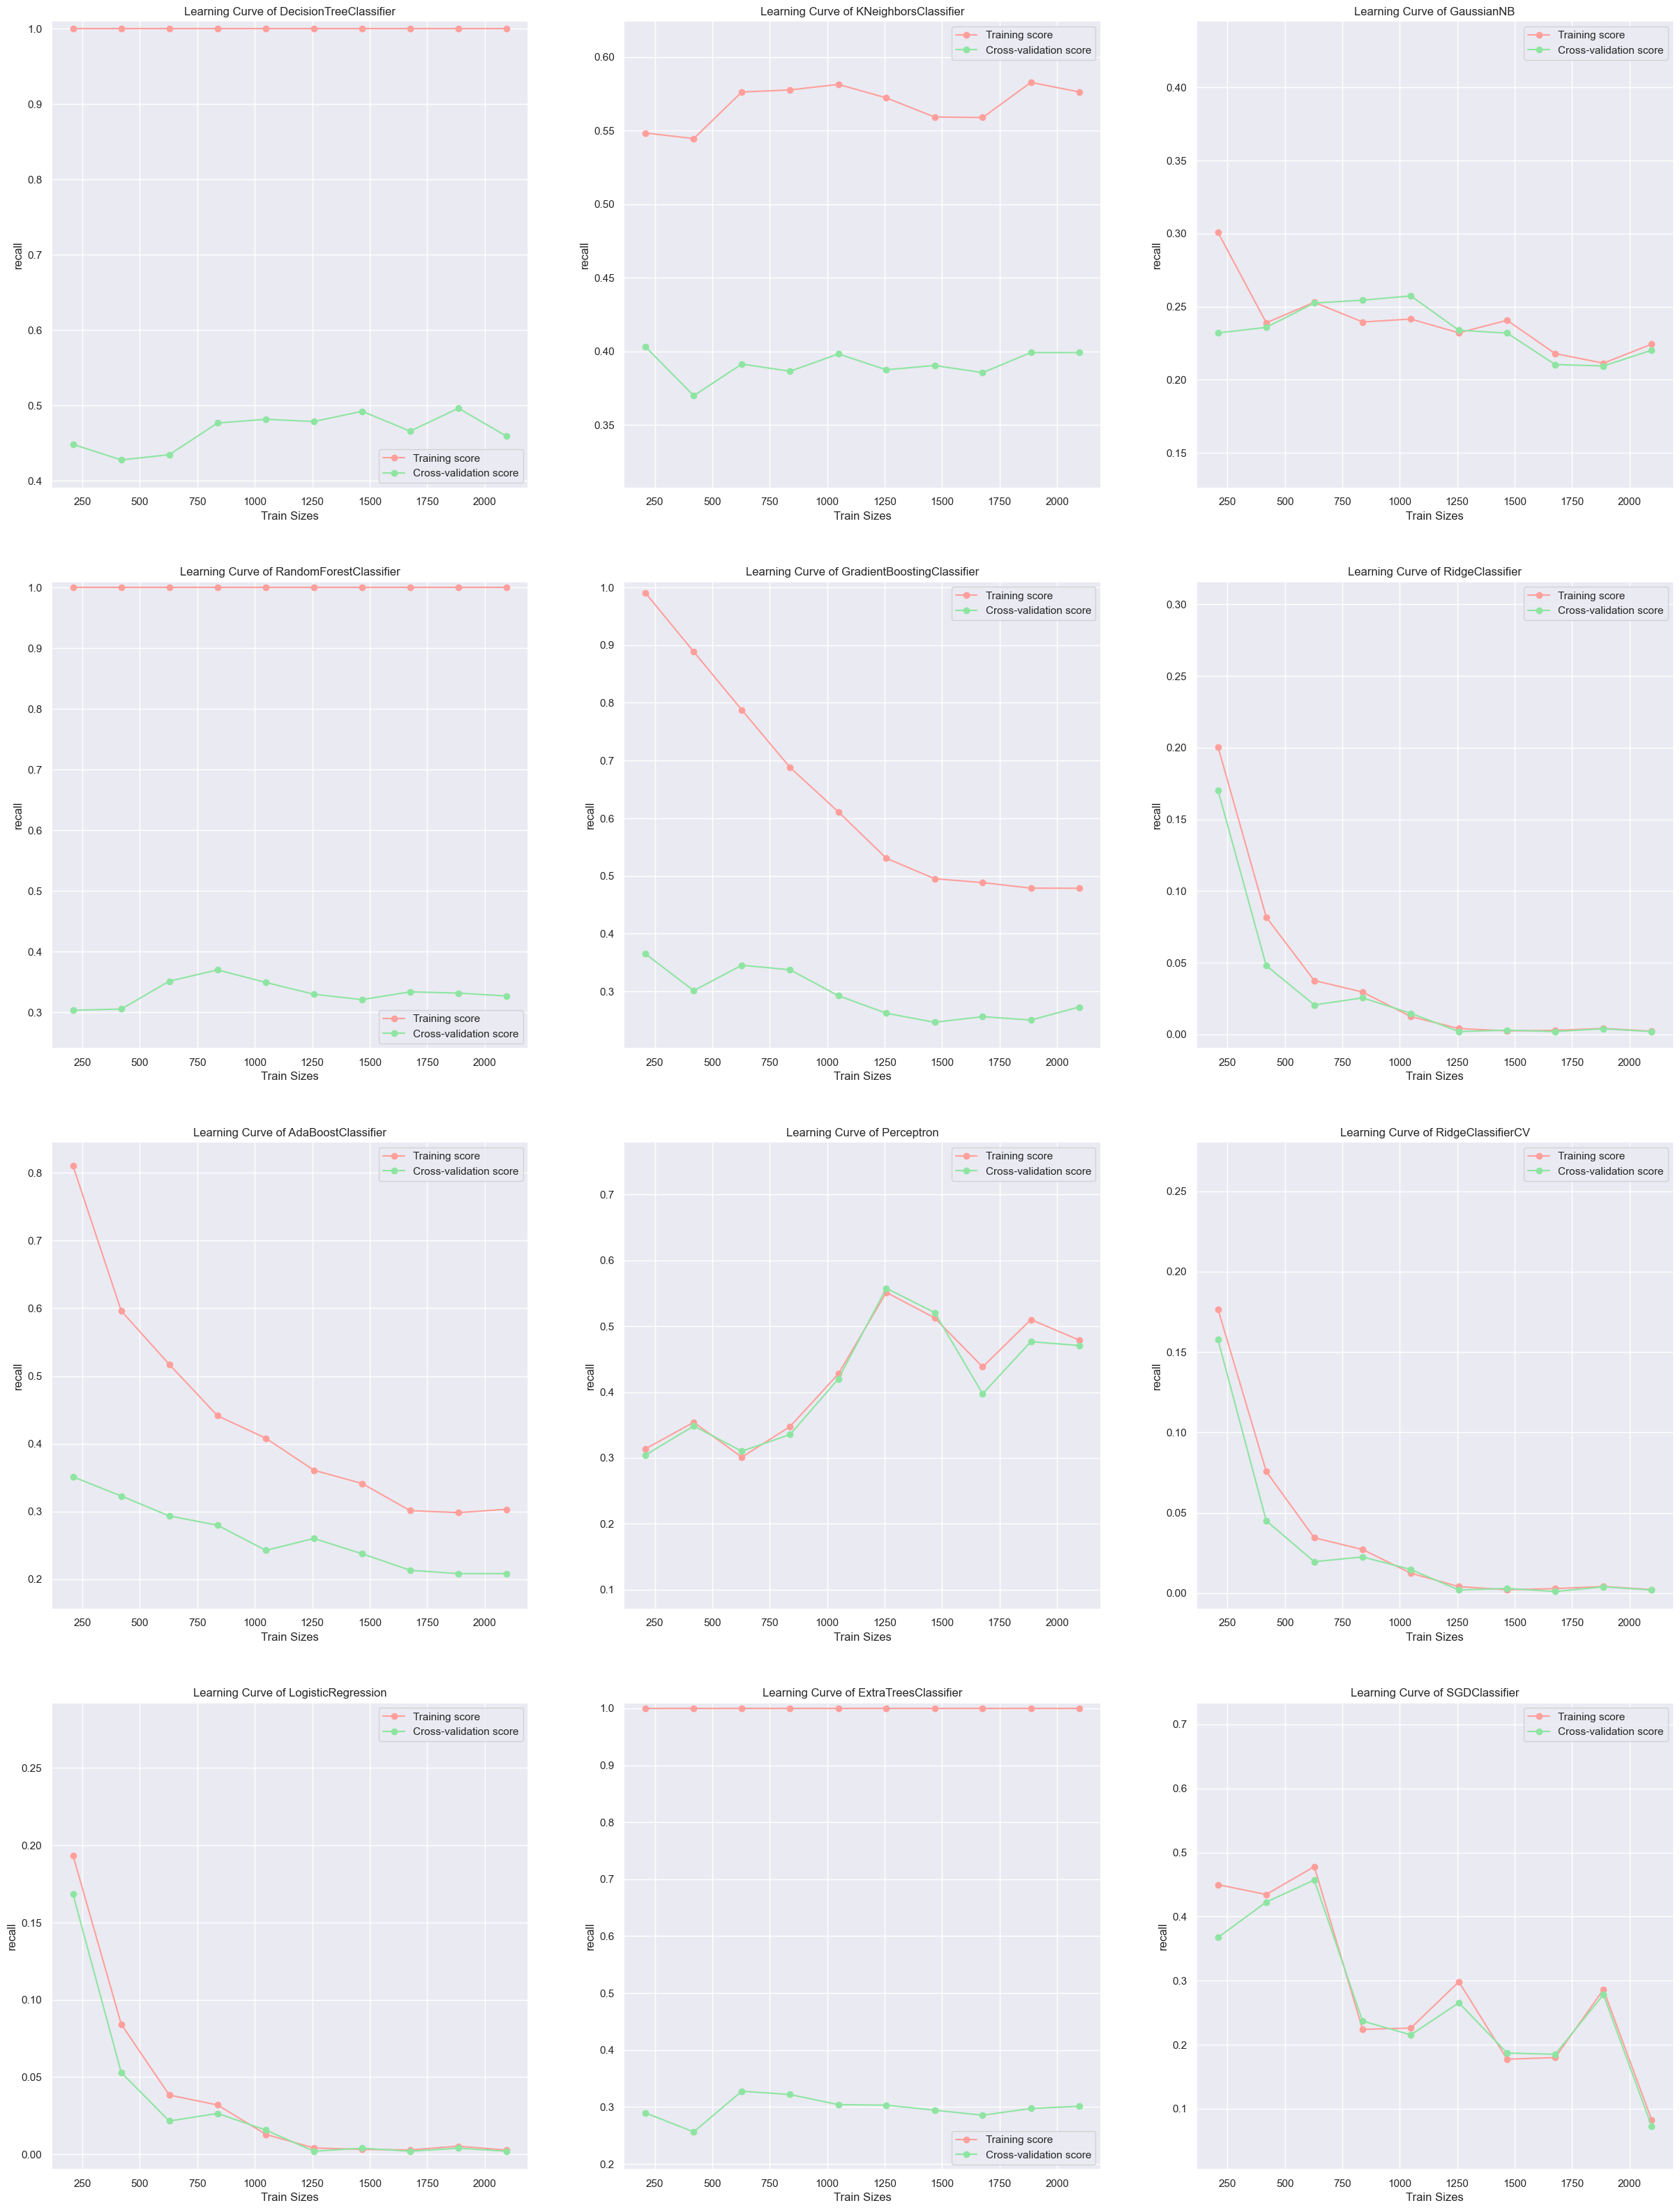

In [104]:
def select_model(X_train, y_train, models, scoring, ax):
    # placeholder
    out = []
    # iterate through models
    for name, model in models:
        # creating temporary pipeline
        steps[STEPS_LEN] = (name, model)
        temp_pipeline = IMBPipeline(steps=steps)
        plot_learning_curve(
            temp_pipeline,
            X_train,
            y_train,
            scoring="recall",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )
        # cross validate
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )
        # get the average score and then store in a Series
        out.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(out).sort_values(
        by=[
            "test_f1",
            "test_recall",
            "test_accuracy",
            "test_roc_auc",
        ],
        ascending=False,
    )


# Since we are comparing 12 models
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_methods, ax)
plt.show()


In [105]:
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
DecisionTreeClassifier,0.217240,0.039204,0.585496,1.000000,0.488311,1.000000,0.478136,1.000000,0.567967,1.000000
KNeighborsClassifier,0.163222,0.064487,0.645802,0.766921,0.413925,0.585342,0.476327,0.662041,0.653018,0.834913
RandomForestClassifier,1.770950,0.068838,0.670992,1.000000,0.357186,1.000000,0.457778,1.000000,0.686206,1.000000
ExtraTreesClassifier,0.605492,0.072417,0.667939,1.000000,0.316067,1.000000,0.425299,1.000000,0.689446,1.000000
Perceptron,0.159943,0.037937,0.524809,0.523876,0.422863,0.407680,0.399013,0.386388,0.511310,0.500750
GradientBoostingClassifier,1.719366,0.044750,0.644656,0.765352,0.260289,0.444992,0.362159,0.596397,0.652663,0.866358
GaussianNB,0.172018,0.041531,0.622519,0.626421,0.218256,0.222658,0.310145,0.317267,0.598343,0.610042
AdaBoostClassifier,0.520637,0.053890,0.612595,0.662511,0.205578,0.280280,0.291396,0.393014,0.562754,0.689403
SGDClassifier,0.162165,0.036138,0.598473,0.597837,0.094812,0.112312,0.136485,0.159090,0.471757,0.501716
RidgeClassifier,0.165032,0.042068,0.610305,0.610221,0.000980,0.000761,0.001942,0.001520,0.487511,0.527795


Based on the results, we can observe our top 3 performing models are
<ol>
    <li> Random Forest Classifier</li>
    <li> Gradient Boosting Classifier</li>
    <li> Extra Tree Classifier</li>
</ol>

While our other models performed equally or worse compared to our baseline model, which is mostly due to underfitting as we can see they have a low f1 score and a low accuracy.

<u>Selecting our model</u>

Look at at our top 3 models with f1 scores of about 0.54, 0.52, 0.52 respectively, comparing this to our Dummy Model f1 score which is around 0.469, we can see that our models perfomed slightly better by 0.5-0.7. We can improve this further by hypertuning our models, but we will have to take a closer look at these models.

Overall, we can see that Random Forest Classifier stands out the most, yielding the best results for accuracy, f1 and test_roc_auc. While Gradient Boosting Classifier had the highest recall score, however it took the longest time to train. Looking at Extra Tree Classifier, it does not stand out compared to Random Forest Classifier or Gradient Boosting Classifier. Hence, we will mainly focus on Random Forest Classier as it is our best perfomer.


In [30]:
print(steps)

[('impute', KNNImputer()), ('rescale', SMOTE(random_state=69)), ('standardize', RobustScaler()), ('SGDClassifier', SGDClassifier())]


### Hypertuning Random Forest Classier

In order to hypertune our model we will have to first look at the possible hyperparameters that we can tune.

In [106]:
list(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

As we can see, there are many different parameters we can tune, therefore, we will only choose the most important ones as tuning all of the parameters would take up too much time.

<u>Parameter to be tuned:</u>
<ul>
    <li>n_estimators</li>
    -Controls number of tree
    <li>max_depth</li>
    -Controls maximum depth of the each decision tree
</ul>

In [107]:
# Create params grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5,10,20,30,40,50,60,70,80,90,100]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create model based on pipeline
steps[STEPS_LEN] = (
    "hyper", GridSearchCV(
        RandomForestClassifier(),
        param_grid,
        cv=kf,
        n_jobs=-1,
        verbose=1,
        scoring="f1"
    )
)

rfc_search = IMBPipeline(steps=steps)

# fit model
rfc_search.fit(X_train, y_train)

print(rfc_search.named_steps["hyper"].best_estimator_)
print(rfc_search.named_steps["hyper"].best_params_)
print(rfc_search.named_steps["hyper"].best_score_)



Fitting 5 folds for each of 33 candidates, totalling 165 fits
RandomForestClassifier(max_depth=70)
{'max_depth': 70, 'n_estimators': 100}
0.4663759711383248


In [108]:
steps[STEPS_LEN] = ("model", rfc_search["hyper"].best_estimator_)
rfc_clf = IMBPipeline(steps=steps)
rfc_clf.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()), ('standardize', RobustScaler()),
                ('model', RandomForestClassifier(max_depth=70))])

In [119]:
steps[STEPS_LEN] = ("model", RandomForestClassifier())

rfc_clf_untuned = IMBPipeline(steps=steps)
rfc_clf_untuned.fit(X_train, y_train)


steps[STEPS_LEN] = ("model", DummyClassifier(strategy="uniform"))

# Create the pipeline
dummy = IMBPipeline(steps=steps)
dummy.fit(X_train, y_train)

# Predicting the Test set results
dummy_y_pred = dummy.predict(X_test)


# KNeighborCLassifer
steps[STEPS_LEN] = ("model", KNeighborsClassifier())

# Create the pipeline
knc = IMBPipeline(steps=steps)
knc.fit(X_train, y_train)



Pipeline(steps=[('impute', KNNImputer()), ('standardize', RobustScaler()),
                ('model', KNeighborsClassifier())])

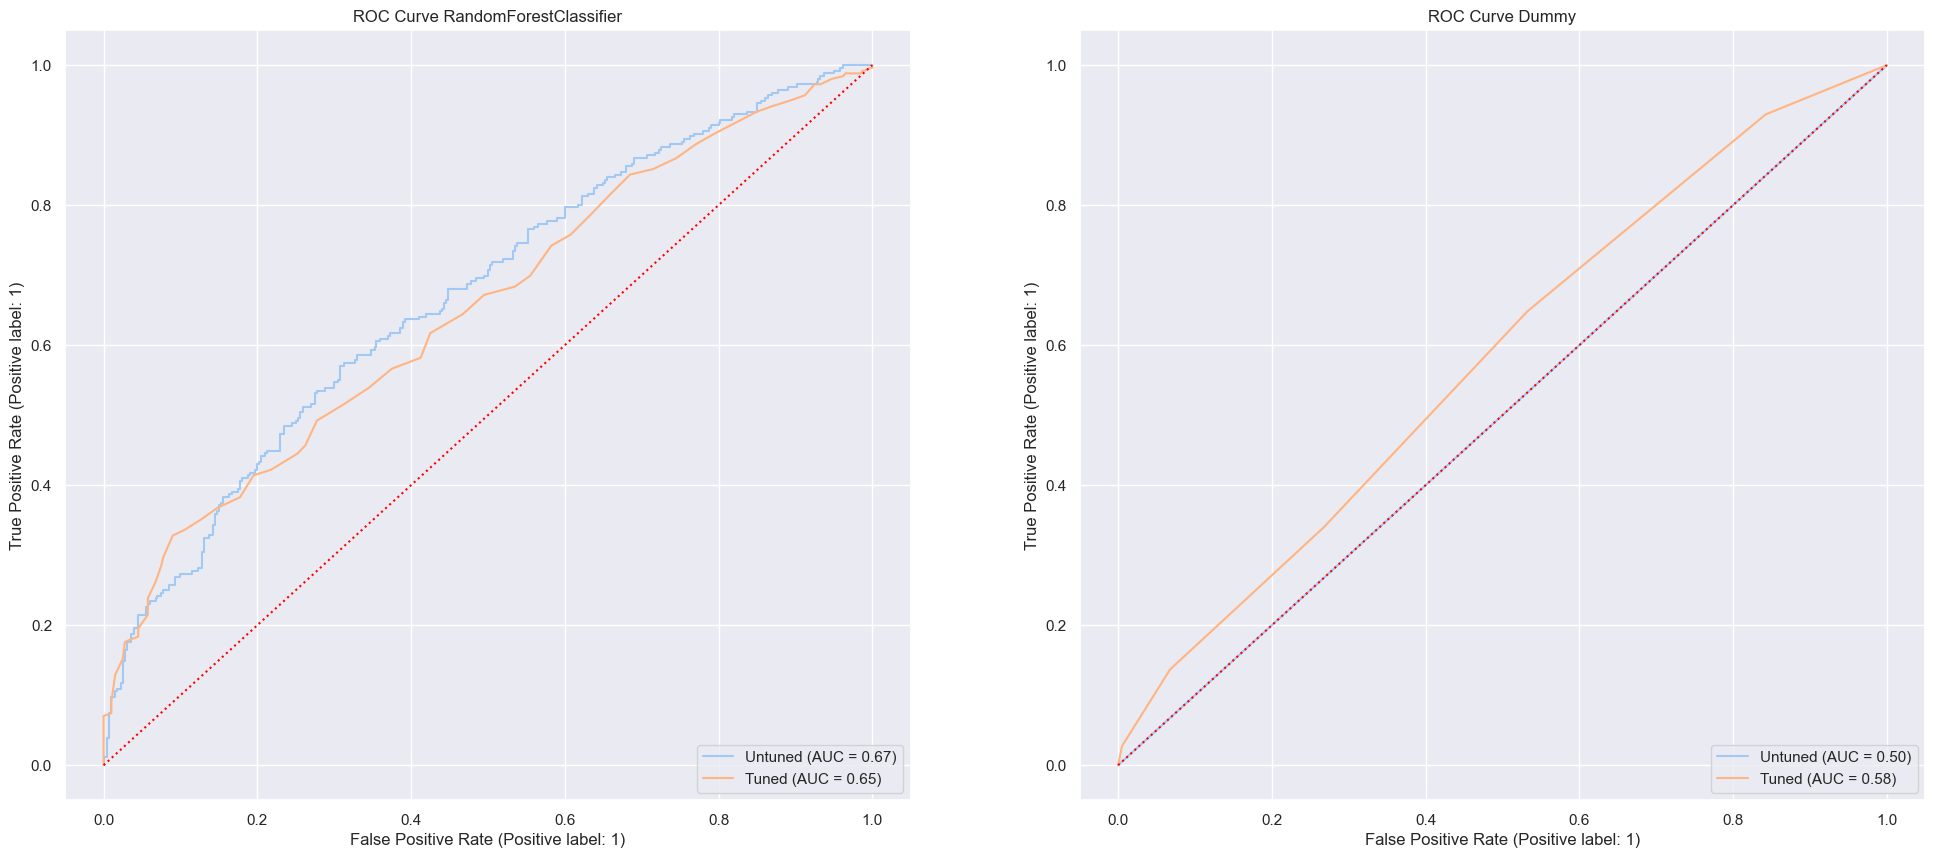

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))
# RandomForestClassifier
RocCurveDisplay.from_estimator(rfc_clf_untuned, X_test, y_test, ax=ax[0], name="Untuned")
RocCurveDisplay.from_estimator(rfc_clf, X_test, y_test, ax=ax[0], name="Tuned")
# RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[0], name="Nth")

# # DecisionTreeClassifier
RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax[1], name="Untuned")
RocCurveDisplay.from_estimator(knc, X_test, y_test, ax=ax[1], name="Tuned")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")

ax[0].set_title("ROC Curve RandomForestClassifier")
ax[1].set_title("ROC Curve Dummy")
plt.show()

In [121]:
rfc_y_pred = rfc_clf.predict(X_test)


print(
    f"""
Random Forest Classifier:
{classification_report(y_test, rfc_y_pred, digits=3)}
)
"""
)


Random Forest Classifier:
              precision    recall  f1-score   support

           0      0.678     0.873     0.763       400
           1      0.638     0.352     0.453       256

    accuracy                          0.669       656
   macro avg      0.658     0.612     0.608       656
weighted avg      0.662     0.669     0.642       656

)



In [112]:
importance = pd.Series(rfc_clf[-1].feature_importances_,index=X_training.columns).sort_values(ascending=False)
print(importance)

Sulfate            0.131085
ph                 0.130083
Hardness           0.118820
Chloramines        0.116781
Solids             0.112146
Trihalomethanes    0.101934
Conductivity       0.100025
Organic_carbon     0.096653
Clarity            0.092472
dtype: float64


In [113]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(
    f"""
Random Forest Classifier:
{classification_report(y_test, y_pred, digits=3)}
)
"""
)



ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values